# Decision Tree - Weather DataSet



OBJETIVO:  Mostrar a árvore gerada, a matriz de confusão, as métricas do modelo, e as regras geradas com as respectivas coberturas. 

In [173]:
# Importando bibliotecas
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

import pydot
import pydotplus

In [174]:
# Ler dados do DataSet
csv_dir_treinamento = "/content/sample_data/weather.nominal.csv"
data_treino = pd.read_csv(csv_dir_treinamento, delimiter=",")

In [175]:
data_treino

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [176]:
# Tratar dados nominais para númericos (Treinamento)
treinamento_classification = data_treino['play']
data_treino.drop(["play"], axis=1, inplace=True)
treinamento_dados = pd.get_dummies(data_treino, columns=['outlook', 'temperature', 'humidity'])

In [177]:
# Atualizar tabela com binários
labelencoder =  preprocessing.LabelEncoder()
treinamento_dados['windy'] = labelencoder.fit_transform(treinamento_dados['windy'])

In [178]:
dataset_teste = treinamento_dados.loc[10:]
dataset_teste_class = treinamento_classification.loc[10:]
dataset_treino = treinamento_dados.loc[0:9]
dataset_treino_class = treinamento_classification.loc[0:9]

In [186]:
# Criando a árvore e definindo o criterio de criação usando entropia
tree_weather = DecisionTreeClassifier(criterion="entropy")
tree_weather = tree_weather.fit(dataset_treino, dataset_treino_class)

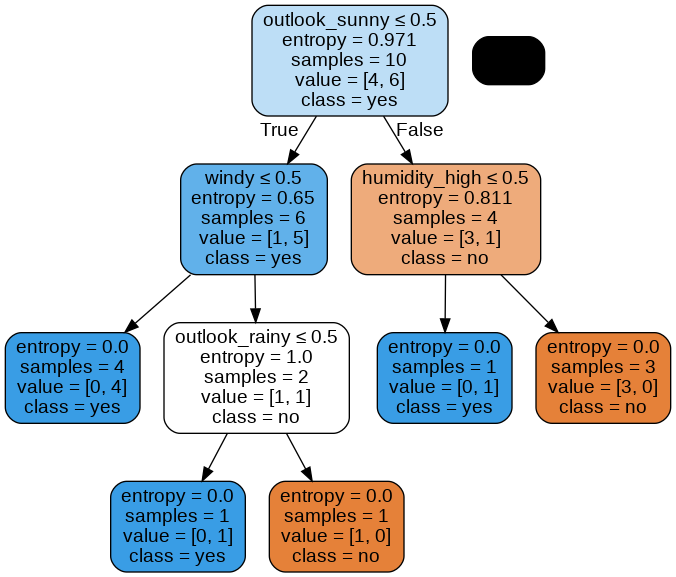

In [187]:
dot_data = tree.export_graphviz(tree_weather, out_file=None,
                                feature_names=dataset_treino.columns.values,
                                class_names=treinamento_classification.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png('tree_weather.png')

from IPython.display import Image
Image(filename='tree_weather.png')

In [188]:
# Importar a biblioteca para mostrar a matriz de confusão da árvore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

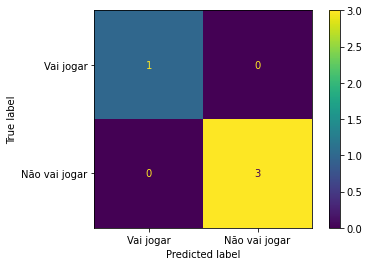

In [189]:
conf_matrix = confusion_matrix(dataset_teste_class, tree_weather.predict(dataset_teste))
labels = ["Vai jogar", "Não vai jogar"]
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
cmd.plot(values_format="d")
plt.show()

In [190]:
# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [192]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(dataset_teste_class, tree_weather.predict(dataset_teste)))
print('\n')
print(classification_report(dataset_teste_class, tree_weather.predict(dataset_teste), target_names=labels))
print('\n')
tn, fp, fn, tp = confusion_matrix(dataset_teste_class, tree_weather.predict(dataset_teste)).ravel()
tnr = tn / (tn + fp) # true negative rate 
fpr = fp / (tn + fp) # false positive rate 
fnr = fn / (fn + tp) # false negative rate 
tpr = tp / (tp + fn) # true positive rate
print('True negative rate: ' + str(tnr))
print('False positive rate: ' + str(fpr))
print('False negative rate: ' + str(fnr))
print('True positive rate: ' + str(tpr))

Accuracy score =  1.0


               precision    recall  f1-score   support

    Vai jogar       1.00      1.00      1.00         1
Não vai jogar       1.00      1.00      1.00         3

     accuracy                           1.00         4
    macro avg       1.00      1.00      1.00         4
 weighted avg       1.00      1.00      1.00         4



True negative rate: 1.0
False positive rate: 0.0
False negative rate: 0.0
True positive rate: 1.0
